## Programming Assignment 3
#### Enrico Absin
Aside from the Adjusted Rand Index (ARI), and Normalized Mutual Information (NMI), use the Folkes-Mallows Index (FMI), and compare the result of each performance index.

   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  
0         1         0     0     4     0         0        1  
1         1         0     0     4     1         0        1  
2         0         0     1     0     1         0        0  
3         1         0     0     4     0         0        1  
4         1         0     0     4     1         0        1  
Adjusted Rand Index (ARI): 0.6638221699267314
Normalized Mutual Information (NMI): 0.7505086268517184
Folkes-Mallows Index (FMI): 0.738152957287530

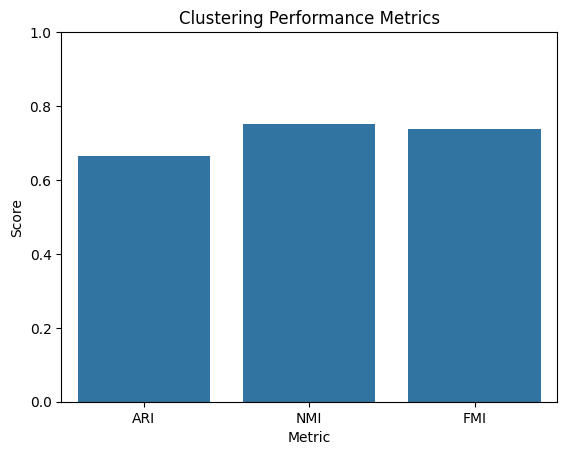

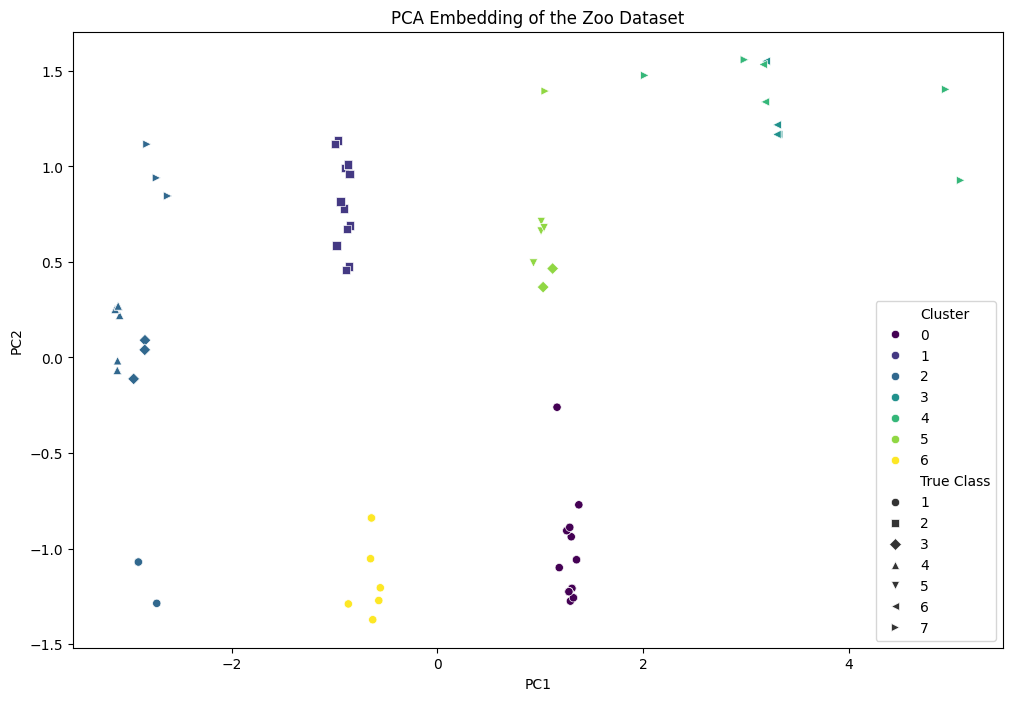

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

data_url = 'zoo.data' 
columns = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 
           'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
df = pd.read_csv(data_url, names=columns)

df.drop('animal_name', axis=1, inplace=True)

X = df.drop('class_type', axis=1)
y_true = df['class_type']

print(X.head())

kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

ari = adjusted_rand_score(y_true, y_pred)
print(f'Adjusted Rand Index (ARI): {ari}')

nmi = normalized_mutual_info_score(y_true, y_pred)
print(f'Normalized Mutual Information (NMI): {nmi}')

fmi = fowlkes_mallows_score(y_true, y_pred)
print(f'Folkes-Mallows Index (FMI): {fmi}')

results = {
    'Metric': ['ARI', 'NMI', 'FMI'],
    'Score': [ari, nmi, fmi]
}
results_df = pd.DataFrame(results)
print(results_df)

sns.barplot(x='Metric', y='Score', data=results_df)
plt.title('Clustering Performance Metrics')
plt.ylim(0, 1)
plt.show()

pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)

embedding_df = pd.DataFrame(data=X_embedded, columns=['PC1', 'PC2'])
embedding_df['Cluster'] = y_pred
embedding_df['True Class'] = y_true

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=embedding_df, palette='viridis', style='True Class', markers=['o', 's', 'D', '^', 'v', '<', '>'])
plt.title('PCA Embedding of the Zoo Dataset')
plt.legend(loc='best')
plt.show()

Compare and contrast each performance index, what are the advantages and disadvantages of ARI, NMI, and FMI, and when to use each?

## Adjusted Rand Index (ARI)
#### Advantage:
- To provide a more realistic estimate, ARI adjusts the Rand Index to take random clustering into account.
#### Disadvantage:
- Given that pairwise comparisons are required, it may be computationally costly for large datasets.
#### When to use:
- When you require a reliable metric that accounts for randomness, particularly when the number of clusters in the dataset is stable and known, use ARI.

***
## Normalized Mutual Information (NMI)
#### Advantage:
- Since NMI is unaffected by the data's absolute values, it can be used to compare various clustering outcomes.
#### Disadvantage:
- Compared to ARI, the values of NMI may be more difficult to understand intuitively.
#### When to use:
- When comparing clustering results with varying numbers of clusters or when a scale-invariant metric is required, utilize NMI.

***
## Folkes-Mallows Index (FMI)
#### Advantage:
- FMI provides a fair assessment of clustering performance by taking into account both recall and precision.
#### Disadvantage:
- FMI does not take random chance into account, unlike ARI, which could lead to inflated ratings for random clusterings.
#### When to use:
- When you require an easy-to-understand assessment of clustering performance—particularly when managing balanced cluster sizes and precision-recall trade-offs—utilize FMI.
***

Using Kmodes and Hierarchical Clustering, use the same dataset and perform categorical data clustering, use FMI, ARI, and NMI for the comparison of performance.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 146.0
Run 1, iteration: 2/100, moves: 1, cost: 146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14, cost: 163.0
Run 2, iteration: 2/100, moves: 3, cost: 162.0
Run 2, iteration: 3/100, moves: 0, cost: 162.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6, cost: 160.0
Run 3, iteration: 2/100, moves: 2, cost: 160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 16, cost: 132.0
Run 4, iteration: 2/100, moves: 2, cost: 132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 16, cost: 159.0
Run 5, iteration: 2/100, moves: 2, cost: 159.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...

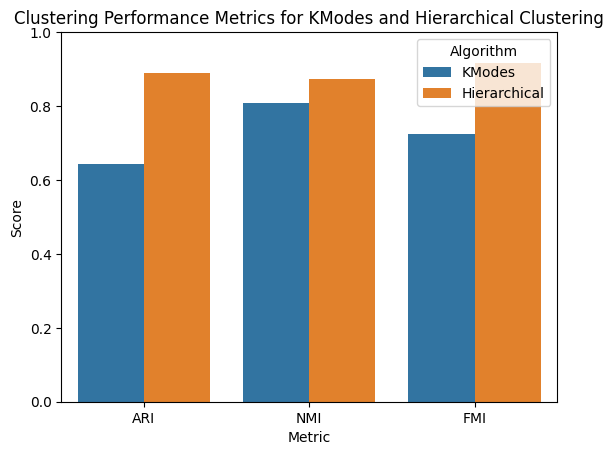

In [9]:
kmodes = KModes(n_clusters=7, init='Huang', n_init=10, verbose=1)
y_kmodes = kmodes.fit_predict(X)

X_encoded = pd.get_dummies(X)
distance_matrix = pdist(X_encoded, metric='hamming')
linkage_matrix = linkage(distance_matrix, method='average')
y_hierarchical = fcluster(linkage_matrix, t=7, criterion='maxclust')

ari_kmodes = adjusted_rand_score(y_true, y_kmodes)
nmi_kmodes = normalized_mutual_info_score(y_true, y_kmodes)
fmi_kmodes = fowlkes_mallows_score(y_true, y_kmodes)

ari_hierarchical = adjusted_rand_score(y_true, y_hierarchical)
nmi_hierarchical = normalized_mutual_info_score(y_true, y_hierarchical)
fmi_hierarchical = fowlkes_mallows_score(y_true, y_hierarchical)

results = {
    'Metric': ['ARI', 'NMI', 'FMI'],
    'KModes': [ari_kmodes, nmi_kmodes, fmi_kmodes],
    'Hierarchical': [ari_hierarchical, nmi_hierarchical, fmi_hierarchical]
}
results_df = pd.DataFrame(results)
print(results_df)

results_melted = results_df.melt(id_vars=['Metric'], value_vars=['KModes', 'Hierarchical'], var_name='Algorithm', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Algorithm', data=results_melted)
plt.title('Clustering Performance Metrics for KModes and Hierarchical Clustering')
plt.ylim(0, 1)
plt.show()

Write your report using Latex. Your report should be focused on the "why's and the what's" of each performance metrices (i.e. why is FMI always greater than ARI and NMI? What's the problem with ARI and NMI?).

## Analyzing Why FMI Often Exceeds ARI and NMI

**Because of its intrinsic qualities, FMI frequently produces greater values than ARI and NMI.** With an emphasis on the overlap between the true and anticipated clusters, FMI assesses the geometric mean of precision and recall directly. Compared to ARI, which corrects for the potential for random clumping, this method typically yields higher results since it does not take random chance into consideration.

**Furthermore, FMI scores higher since it is less sensitive to small differences in cluster assignments due to its balanced assessment of precision and recall.** However, ARI and NMI are more rigorous in their assessment, taking into account scale (NMI) and chance (ARI), which usually leads to lower scores.

## Problems with ARI and NMI

**ARI:** Although the ARI corrects for chance to offer a corrected measure, this can result in lower scores, particularly in cases when the clustering is nearly random or there are numerous small clusters. Sometimes, this sensitivity masks important grouping structures.

**NMI:** NMI may be less intuitive and more difficult to understand due to its emphasis on mutual information and entropy. Additionally, it is sensitive to cluster overlap, which can lead to poorly differentiated clusters and lower scores.
